In [1]:
import gevfit
import analysis
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from sklearn.utils import resample

## Plots all of the Total Runtimes as a Function of the Number of Ranks

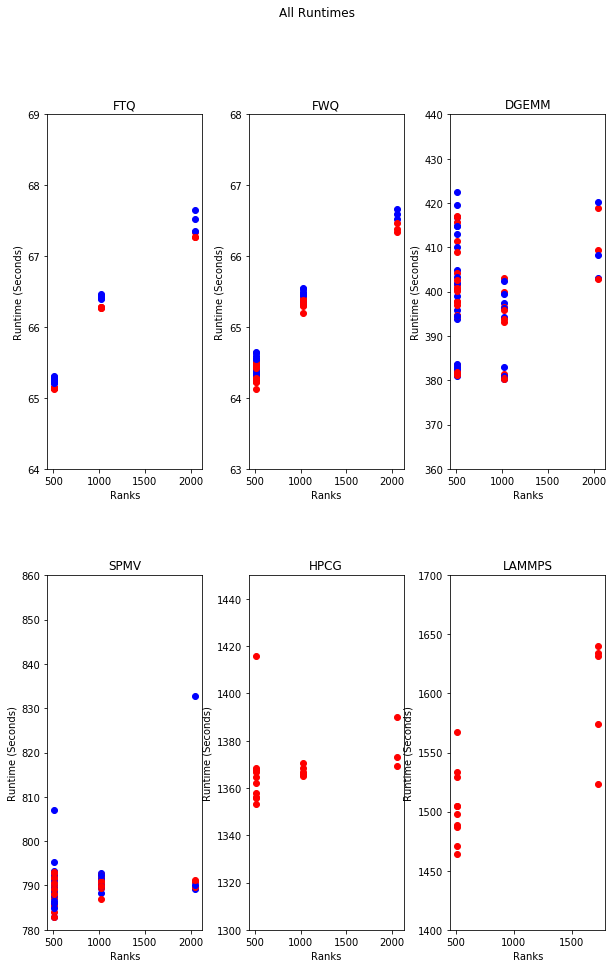

In [2]:
coriData = pd.read_csv("Results/CoriData.csv")

fig, axs = plt.subplots(2, 3, figsize=(10,15))
fig.suptitle('All Runtimes')
plt.subplots_adjust(wspace = .3,hspace =.3)


MILLION = 1000000
yMin = 0
yMax = 0
count = 0

for run in range(0, len(coriData)):
    label = ''
    workload = coriData['Workload'][run]
    ranks = coriData['Ranks'][run]
    stencil = coriData['Stencil'][run]

    currentRunTime = coriData['Runtime'][run]
   
    if int(stencil) > 0:
        label = label + 'Stencil'
        
    if label == '':
        if (workload == 'sleep'):
            axs[0][0].plot(int(ranks), currentRunTime, 'o', color='red'),
        elif (workload == 'fwq'):
            axs[0][1].plot(int(ranks), currentRunTime, 'o', color='red'),
        elif (workload == 'dgemm'):
            axs[0][2].plot(int(ranks), currentRunTime, 'o', color='red'),
        elif (workload == 'spmv'):   
            axs[1][0].plot(int(ranks), currentRunTime, 'o', color='red'),
        elif (workload == 'hpcg'):    
            axs[1][1].plot(int(ranks), currentRunTime, 'o', color='red'),
        elif (workload == 'lammps'):       
            axs[1][2].plot(int(ranks), currentRunTime, 'o', color='red')

    elif label == 'Stencil':
        if (workload == 'sleep'):
            axs[0][0].plot(int(ranks), currentRunTime, 'o', color='blue'),
        elif (workload == 'fwq'):
            axs[0][1].plot(int(ranks), currentRunTime, 'o', color='blue'),
        elif (workload == 'dgemm'):
            axs[0][2].plot(int(ranks), currentRunTime, 'o', color='blue'),
        elif (workload == 'spmv'):   
            axs[1][0].plot(int(ranks), currentRunTime, 'o', color='blue'),
        elif (workload == 'hpcg'):  
            axs[1][1].plot(int(ranks), currentRunTime, 'o', color='blue'),
        elif (workload == 'lammps'):      
            axs[1][2].plot(int(ranks), currentRunTime, 'o', color='blue')
       # StencilMeta.loc[len(StencilMeta)] = [int(ranks), currentRunTime]       
        
    if count == 0:
        yMin = currentRunTime
        yMax = currentRunTime
    else:
        if yMin > currentRunTime:
            yMin = currentRunTime
        elif yMax < currentRunTime:
            yMax = currentRunTime
                
    count = count + 1

_ = axs[0][0].set_ylim([64, 69])
_ = axs[0][0].set_title('FTQ')
_ = axs[0][0].set_xlabel('Ranks')
_ = axs[0][0].set_ylabel('Runtime (Seconds)')

_ = axs[0][1].set_ylim([63, 68])
_ = axs[0][1].set_title('FWQ')
_ = axs[0][1].set_xlabel('Ranks')
_ = axs[0][1].set_ylabel('Runtime (Seconds)')

_ = axs[0][2].set_ylim([360, 440])
_ = axs[0][2].set_title('DGEMM')
_ = axs[0][2].set_xlabel('Ranks')
_ = axs[0][2].set_ylabel('Runtime (Seconds)')

_ = axs[1][0].set_ylim([780, 860])
_ = axs[1][0].set_title('SPMV')
_ = axs[1][0].set_xlabel('Ranks')
_ = axs[1][0].set_ylabel('Runtime (Seconds)')

_ = axs[1][1].set_ylim([1300, 1450])
_ = axs[1][1].set_title('HPCG')
_ = axs[1][1].set_xlabel('Ranks')
_ = axs[1][1].set_ylabel('Runtime (Seconds)')

_ = axs[1][2].set_ylim([1400, 1700])
_ = axs[1][2].set_title('LAMMPS')
_ = axs[1][2].set_xlabel('Ranks')
_ = axs[1][2].set_ylabel('Runtime (Seconds)')

### Experiments 85-104: Cori DGemm on 512 Ranks - 500 Iterations
### Experiments 105-114: Cori DGemm on 1024 Ranks - 500 Iterations

#### Each Experiment Contains 4 Verbose Runs:
- DGemm: a=256, b=64, 500 iterations, no interference
- DGemm: a=256, b=64, 500 iterations, stencil size 32768
- DGemm: a=256, b=64, 500 iterations, rabbit workload (Not using)
- DGemm: a=256, b=64, 500 iterations, both stencil and rabbit workload (Not using)

In [3]:
# Get DataFrame of All Experiments
df_All = analysis.getAllExperiments()

# Get only Cori DGemm 512 Rank data
df_Cori_DGemm_512 = df_All.loc[df_All['Experiment'].isin(list(range(85, 105)))]

# Get only Cori DGemm 1024 Rank data
df_Cori_DGemm_1024 = df_All.loc[df_All['Experiment'].isin(list(range(105, 115)))]

# Get Runs on Cori DGemm with 512 Ranks  
df_Cori_DGemm_512_NoStencil = df_Cori_DGemm_512[(df_Cori_DGemm_512['workload'] == 'dgemm') & (df_Cori_DGemm_512['stencil_size'] == 0) & (df_Cori_DGemm_512['rabbit'] == 0) & (df_Cori_DGemm_512['rabbit_workload'] == 0) & (df_Cori_DGemm_512['osu'] == 0)]
# df_Cori_DGemm_512_Interference = df_Cori_DGemm_512[(df_Cori_DGemm_512['workload'] == 'dgemm') & (df_Cori_DGemm_512['stencil_size'] ==32768) & (df_Cori_DGemm_512['rabbit'] == 0) & (df_Cori_DGemm_512['rabbit_workload'] == 1) & (df_Cori_DGemm_512['osu'] == 0)]
df_Cori_DGemm_512_Stencil = df_Cori_DGemm_512[(df_Cori_DGemm_512['workload'] == 'dgemm') & (df_Cori_DGemm_512['stencil_size'] ==32768) & (df_Cori_DGemm_512['rabbit'] == 0) & (df_Cori_DGemm_512['rabbit_workload'] == 0) & (df_Cori_DGemm_512['osu'] == 0)]
# df_Cori_DGemm_512_Interference_NoStencil = df_Cori_DGemm_512[(df_Cori_DGemm_512['workload'] == 'dgemm') & (df_Cori_DGemm_512['stencil_size'] ==0) & (df_Cori_DGemm_512['rabbit'] == 0) & (df_Cori_DGemm_512['rabbit_workload'] == 1) & (df_Cori_DGemm_512['osu'] == 0)]

### Based off of 512 Rank DGemm Runs, Generate Confidence Interval and Overlay with Actual Runtimes

No Stencil
Stencil


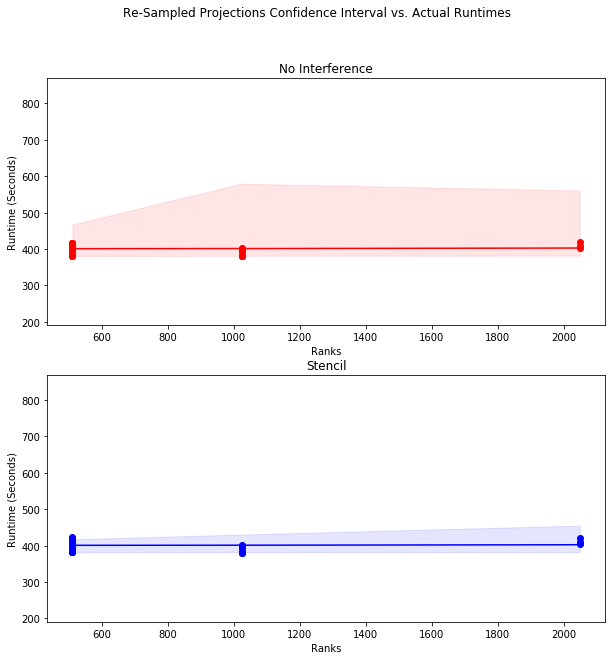

In [4]:
baseranks = 512
kvals = np.array([1, 2, 4])
iterations = 50

MILLION = 1000000
yMin = 0
yMax = 0
count = 0

fig, axs = plt.subplots(2, 1, figsize=(10,10))
fig.suptitle('Re-Sampled Projections Confidence Interval vs. Actual Runtimes')

count = 0
labels = ['No Stencil', 'Stencil']

for df in [df_Cori_DGemm_512_NoStencil, df_Cori_DGemm_512_Stencil]:    
    print(labels[count])
    
    lowerBound = []
    median = []
    upperBound = []
    for k in kvals:   
        expList = []
        for run in range(0, len(df)):
            currentRun = df.iloc[run]
            eid = currentRun['Experiment']
            rid = currentRun['expid']
            currentPath = './mlruns/' + str(eid) + '/' + str(rid) + '/artifacts/bsp-trace.json'
            currentData = analysis.getData(currentPath)
            currentData = currentData[currentData['rank'] == 0]
            
            for i in range(iterations):
                data = analysis.resample_project(currentData, len(currentData), k, col='interval_max_usec')
                projectedRunTime = sum(data) / MILLION
                expList.append(projectedRunTime)
            expList.sort()
        
        lowerBound.append(expList[0])
        median.append(expList[int(len(expList) / 2)])
        upperBound.append(expList[-1])
    
    if count == 0:
        _ = axs[1].plot(baseranks * kvals, median, color='blue')
        _ = axs[1].fill_between(baseranks * kvals, lowerBound, upperBound, color='blue', alpha=.1)
    if count == 1:
        _ = axs[0].plot(baseranks * kvals, median, color='red')
        _ = axs[0].fill_between(baseranks * kvals, lowerBound, upperBound, color='red', alpha=.1)
    
    if count == 0:
        yMin = min(lowerBound)
        yMax = max(upperBound)
    else:
        if yMin > min(lowerBound):
            yMin = min(lowerBound)
        if yMax < max(upperBound):
            yMax = max(upperBound)
            
    count = count + 1

for run in range(0, len(coriData)):
    label = ''
    workload = coriData['Workload'][run]
    ranks = coriData['Ranks'][run]
    stencil = coriData['Stencil'][run]

    currentRunTime = coriData['Runtime'][run]
   
    if int(stencil) > 0:
        label = label + 'Stencil'
        
    if label == '':
        if (workload == 'dgemm'):
            axs[0].plot(int(ranks), currentRunTime, 'o', color='red')

    if label == 'Stencil':
        if (workload == 'dgemm'):
            axs[1].plot(int(ranks), currentRunTime, 'o', color='blue')
            
_ = axs[0].set_ylim([0.5 * yMin, 1.5 * yMax])
_ = axs[0].set_title('No Interference')
_ = axs[0].set_xlabel('Ranks')
_ = axs[0].set_ylabel('Runtime (Seconds)')

_ = axs[1].set_ylim([0.5 * yMin, 1.5 * yMax])
_ = axs[1].set_title('Stencil')
_ = axs[1].set_xlabel('Ranks')
_ = axs[1].set_ylabel('Runtime (Seconds)')